# Linear regression

Real estate analysis


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
data1=pd.read_excel("Linear Regression.xlsx",sheet_name=0)

In [6]:
data1.head()

,price,sqft_living,bedrooms,bathrooms,floors
0,221900,1180,3,1.00,1.0
1,538000,2570,3,2.25,2.0
2,180000,770,2,1.00,1.0
3,604000,1960,4,3.00,1.0
4,510000,1680,3,2.00,1.0


In [10]:
data1.dtypes

price            int64
sqft_living      int64
bedrooms         int64
bathrooms      float64
floors         float64
dtype: object

In [11]:
data1.describe()

,price,sqft_living,bedrooms,bathrooms,floors
count,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,2079.899736,3.370842,2.114757,1.494309
std,3.671272e+05,918.440897,0.930062,0.770163,0.539989
min,7.500000e+04,290.000000,0.000000,0.000000,1.000000
25%,3.219500e+05,1427.000000,3.000000,1.750000,1.000000
50%,4.500000e+05,1910.000000,3.000000,2.250000,1.500000
75%,6.450000e+05,2550.000000,4.000000,2.500000,2.000000
max,7.700000e+06,13540.000000,33.000000,8.000000,3.500000


In [13]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   price        21613 non-null  int64  
 1   sqft_living  21613 non-null  int64  
 2   bedrooms     21613 non-null  int64  
 3   bathrooms    21613 non-null  float64
 4   floors       21613 non-null  float64
dtypes: float64(2), int64(3)
memory usage: 844.4 KB


In [29]:
data1.isna().sum()

price          0
sqft_living    0
bedrooms       0
bathrooms      0
floors         0
dtype: int64

# EDA

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001E3CCFD2848>,
      dtype=object)

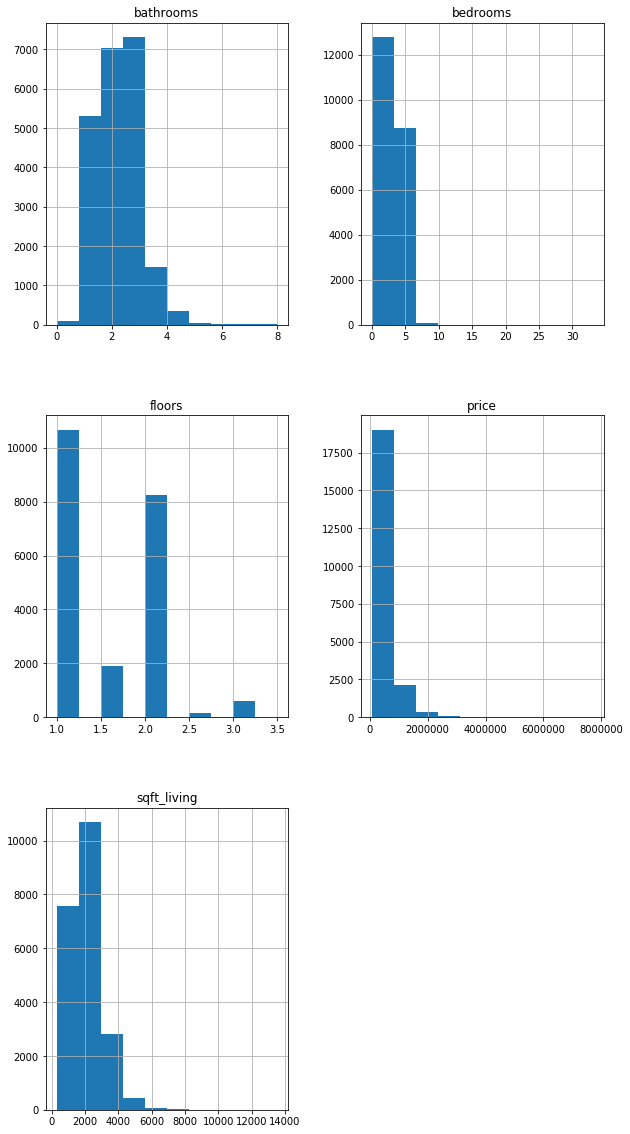

In [60]:
data1.hist(figsize=(10,20))

In [27]:
data1.corr()

,price,sqft_living,bedrooms,bathrooms,floors
price,1.000000,0.702035,0.308350,0.525138,0.256794
sqft_living,0.702035,1.000000,0.576671,0.754665,0.353949
bedrooms,0.308350,0.576671,1.000000,0.515884,0.175429
bathrooms,0.525138,0.754665,0.515884,1.000000,0.500653
floors,0.256794,0.353949,0.175429,0.500653,1.000000


# Model

In [37]:
data1.head()

,price,sqft_living,bedrooms,bathrooms,floors
0,221900,1180,3,1.00,1.0
1,538000,2570,3,2.25,2.0
2,180000,770,2,1.00,1.0
3,604000,1960,4,3.00,1.0
4,510000,1680,3,2.00,1.0


In [38]:
data1.isna().sum()

price          0
sqft_living    0
bedrooms       0
bathrooms      0
floors         0
dtype: int64

there is a no any missing value here

lets create a model

In [43]:
x=data1.iloc[:,-4:]
x.head(2)

,sqft_living,bedrooms,bathrooms,floors
0,1180,3,1.00,1.0
1,2570,3,2.25,2.0


In [44]:
y=data1.iloc[:,0:1]
y.head(2)

,price
0,221900
1,538000


# train_test_split

In [45]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=2)

In [46]:
data1.shape

(21613, 5)

calling Linear regression

In [47]:
from sklearn.linear_model import LinearRegression
mul_reg=LinearRegression()

In [48]:
mul_reg

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

# TRAIN

In [50]:
mul_reg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

# TEST

In [51]:
ypred=mul_reg.predict(x_test)

In [52]:
ypred

array([[608095.96846158],
       [585712.20079791],
       [416482.58364346],
       ...,
       [683810.03201802],
       [221742.65972713],
       [426849.61955589]])

In [53]:
data1.head()

,price,sqft_living,bedrooms,bathrooms,floors
0,221900,1180,3,1.00,1.0
1,538000,2570,3,2.25,2.0
2,180000,770,2,1.00,1.0
3,604000,1960,4,3.00,1.0
4,510000,1680,3,2.00,1.0


# Forecast

In [66]:
unseen_predict=mul_reg.predict(np.array([[1180,3,1.00,1.0]]))

In [56]:
print("The price of the flat for givened specifications is",unseen_predict)

The price of the flat for givened specifications is [[275472.07505764]]


# Evaluation

In [58]:
from sklearn.metrics import r2_score,mean_squared_error
print("The R square is",r2_score(y_test,ypred))
print('The RMSE value is',mean_squared_error(y_test,ypred))

The R square is 0.5166693554435362
The RMSE value is 67476917917.179306


here R square value is 0.5166 it means that independent value affects 51% to dependent value 

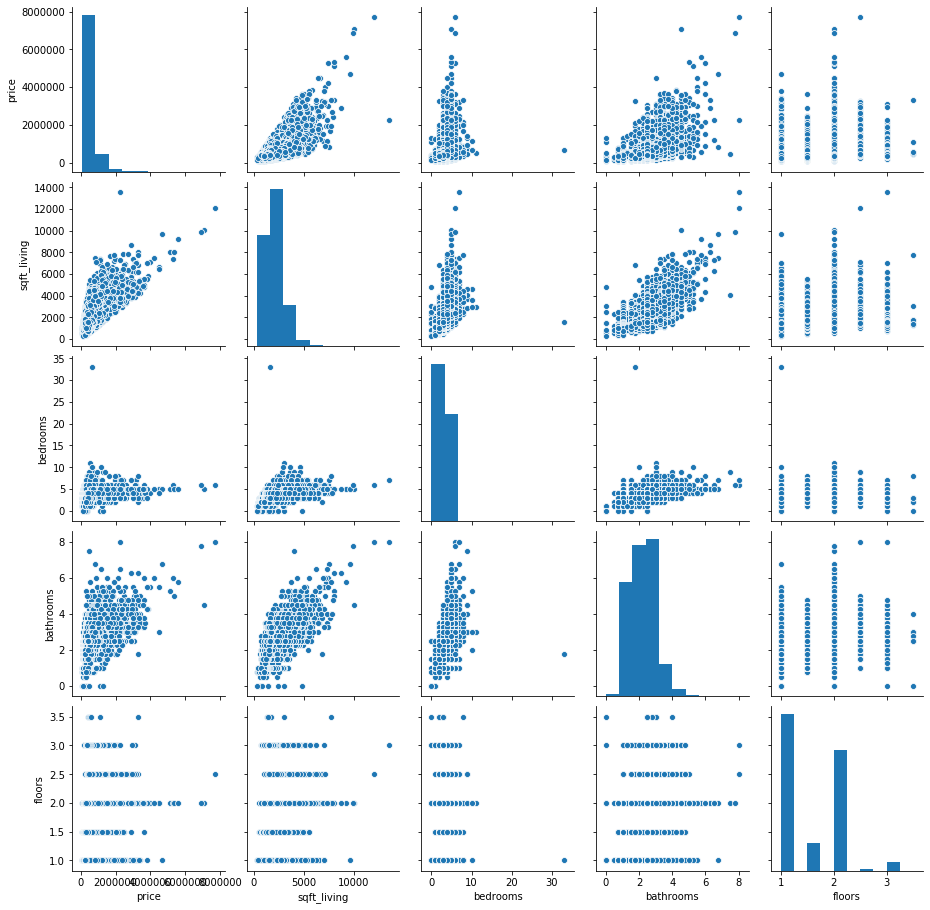

In [63]:
sns.pairplot(data1)

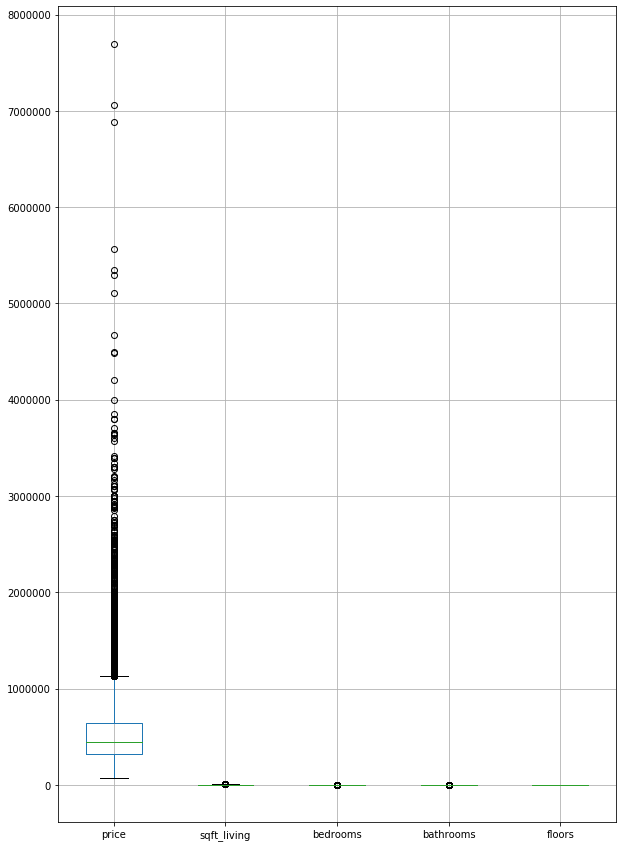

In [65]:
data1.boxplot(figsize=(10,15))